## **CREDIT-WORTHINESS OF SMALL BUSINESSES**
#### Case study of small businesses guaranteed by the U.S. Small Business Administration(SBA)

### **Business Overview**

The Small Business Administration (SBA) is a crucial organization in the United States that supports and promotes small enterprises by providing access to credit. Through loan guarantees, the SBA encourages lenders to provide credit to small businesses, which play a vital role in job creation and reducing unemployment. However, there have been instances of loan defaults, posing a challenge for the SBA in accurately assessing the creditworthiness of applicants and mitigating risks. To address this, the SBA focuses on evaluating creditworthiness by considering factors such as financial history, business plans, collateral, and projected cash flows. They also strive to adapt to market dynamics, embracing innovative approaches and technology for informed lending decisions that minimize the likelihood of defaults. Overall, the SBA's commitment to supporting small businesses goes beyond loan guarantees, encompassing mentorship programs, training resources, government contracting opportunities, and disaster recovery assistance to foster an environment conducive to small business success.

<b> Stakeholders </b>
- Government / Lending institutions such as the SBA
- Small Businesses

### Project Overview

This project focuses on utilizing the dataset from the U.S. Small Business Administration to develop a predictive model for loan application approval. By analyzing relevant factors and historical loan data, the project aims to create a reliable system that assists the SBA in making informed decisions while minimizing the risk of defaults. The ultimate goal is to provide the SBA with a robust loan approval model that enhances their ability to make accurate and efficient lending decisions.

### Objectives

1. Conduct a comprehensive analysis of the dataset from the U.S. Small Business Administration to identify patterns and trends for accurate loan approval predictions.
2. Develop a robust machine learning model that utilizes the identified patterns and trends to predict loan approval outcomes effectively.
3. Deploy and evaluate the developed machine learning model in the loan approval process of the U.S. Small Business Administration, continuously optimizing its predictive capabilities for informed lending decisions.


## Data Understanding

The data used to conduct this project was extracted from the official US Small Business Administration open data [source](https://data.sba.gov/dataset/). The data had a total of 899,164 rows and 27 columns. 
In this section we begin by importing the necessary libraries that will be used throughout the notebook, we then went on to load the datasets, as well as further understanding the data by displaying the summary statistics, as well as checking for missing values. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings 
pd.set_option('display.max_columns', None)

# Data preprocessing and transformation
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

# Classification model libraries
from sklearn.metrics import accuracy_score, precision_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier 
from keras.models import Sequential
from keras.layers import Dense,Flatten

# Grid Search CV
from sklearn.model_selection import GridSearchCV

# Pipeline and feature selection
from sklearn.pipeline import Pipeline

In [2]:
# Reading SBA Data
df = pd.read_csv('data/SBAnational.csv',low_memory=False)
df.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,84,4,2.0,0,0,1,0,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,60,2,2.0,0,0,1,0,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,180,7,1.0,0,0,1,0,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,60,2,1.0,0,0,1,0,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,240,14,1.0,7,7,1,0,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


In [3]:
# Reading Foia Data
df2 = pd.read_csv("data/foia-7afy2020-present-asof-230331.csv",encoding='latin-1', engine='python')
df2.head()

,AsOfDate,Program,BorrName,BorrStreet,BorrCity,BorrState,BorrZip,BankName,BankFDICNumber,BankNCUANumber,BankStreet,BankCity,BankState,BankZip,GrossApproval,SBAGuaranteedApproval,ApprovalDate,ApprovalFiscalYear,FirstDisbursementDate,DeliveryMethod,subpgmdesc,InitialInterestRate,TermInMonths,NaicsCode,NaicsDescription,FranchiseCode,FranchiseName,ProjectCounty,ProjectState,SBADistrictOffice,CongressionalDistrict,BusinessType,BusinessAge,LoanStatus,PaidInFullDate,ChargeOffDate,GrossChargeOffAmount,RevolverStatus,JobsSupported,SOLDSECMRTIND
0,20230331,7A,Allen Foot and Ankle Medicine,2919 S ELLSWORTH RD STE 124,MESA,AZ,85212,Western Alliance Bank,57512.0,NaN,1 E Washington St,PHOENIX,AZ,85004.0,350000.0,175000.0,10/01/2019,2020,10/31/2019,SBA EXPRES,FA$TRK (Small Loan Express),5.5,63,621391.0,Offices of Podiatrists,NaN,NaN,MARICOPA,AZ,ARIZONA DISTRICT OFFICE,4.0,CORPORATION,Existing or more than 2 years old,PIF,12/31/2022,NaN,0,0,0,N
1,20230331,7A,Cojutepeque Restaurant,2610 W 3rd St,Los Angeles,CA,90057,Banner Bank,28489.0,NaN,10 S First Ave,WALLA WALLA,WA,99362.0,1040000.0,780000.0,10/01/2019,2020,10/31/2019,PLP,Guaranty,6.5,300,722511.0,Full-Service Restaurants,NaN,NaN,LOS ANGELES,CA,LOS ANGELES DISTRICT OFFICE,34.0,CORPORATION,Existing or more than 2 years old,EXEMPT,NaN,NaN,0,0,12,Y
2,20230331,7A,Adwa LLC,3105 ALDERWOOD MALL BLVD Suite,LYNNWOOD,WA,98036,Umpqua Bank,17266.0,NaN,"445 SE Main St, First Fl",ROSEBURG,OR,97470.0,987500.0,740625.0,10/01/2019,2020,10/31/2019,PLP,Guaranty,7.0,120,451110.0,Sporting Goods Stores,NaN,NaN,SNOHOMISH,WA,SEATTLE DISTRICT OFFICE,1.0,CORPORATION,Change of Ownership,EXEMPT,NaN,NaN,0,0,14,Y
3,20230331,7A,Town Cleaners,2700 WASHINGTON BLVD #B,ARLINGTON,VA,22201,Hanmi Bank,24170.0,NaN,"3660 Wilshire Blvd, PH-A",LOS ANGELES,CA,90010.0,22000.0,11000.0,10/01/2019,2020,10/31/2019,SBA EXPRES,FA$TRK (Small Loan Express),9.0,51,812320.0,Drycleaning and Laundry Services (except Coin-...,NaN,NaN,ARLINGTON,VA,WASHINGTON DISTRICT OFFICE,8.0,INDIVIDUAL,Existing or more than 2 years old,CHGOFF,NaN,09/07/2022,15570,0,2,Y
4,20230331,7A,Moor Inc.,524 WOODSIDE RD,REDWOOD CITY,CA,94061,"JPMorgan Chase Bank, National Association",628.0,NaN,1111 Polaris Pkwy,COLUMBUS,OH,43240.0,49000.0,24500.0,10/01/2019,2020,10/31/2019,SBA EXPRES,FA$TRK (Small Loan Express),11.5,120,445110.0,Supermarkets and Other Grocery (except Conveni...,NaN,NaN,SAN MATEO,CA,SAN FRANCISCO DISTRICT OFFICE,14.0,CORPORATION,Existing or more than 2 years old,PIF,01/31/2023,NaN,0,1,0,N


In [4]:
# Compatibility of dependent variable
df2.LoanStatus.value_counts()

EXEMPT    121746
COMMIT     17858
CANCLD     14980
PIF        13147
CHGOFF       480
Name: LoanStatus, dtype: int64

In [5]:
# Foia Data as a percentage of SBA Data
len(df2)/len(df)

0.18707488289121896

Since Foia data is incompatible and of negligible size, we proceeded with the SBA data only for our analysis

In [6]:
class Describer:
    
    # initialize object
    def __init__(self, df):
        self.df = df
        
    # method to check shape of data
    def shape(self):
        shape_df = print(f"The DataFrame has:\n\t* {self.df.shape[0]} rows\n\t* {self.df.shape[1]} columns", '\n')
        return shape_df
    
    # method to check info on dataset
    def data_info(self):
        info_df = print(self.df.info(), '\n')
        return info_df
    
    # method to describe numerical columns
    def data_describe(self):
        num_col = self.df.describe()
        return num_col

In [7]:
# creating an instance of the class describer
describe_df = Describer(df)

# Viewing the shape of the data
describe_df.shape()

The DataFrame has:
	* 899164 rows
	* 27 columns 



In [8]:
# summary information
print('Summary infomation on dataset')
print('-----------------------------------------------')
describe_df.data_info()

Summary infomation on dataset
-----------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      899164 non-null  int64  
 1   Name               899150 non-null  object 
 2   City               899134 non-null  object 
 3   State              899150 non-null  object 
 4   Zip                899164 non-null  int64  
 5   Bank               897605 non-null  object 
 6   BankState          897598 non-null  object 
 7   NAICS              899164 non-null  int64  
 8   ApprovalDate       899164 non-null  object 
 9   ApprovalFY         899164 non-null  object 
 10  Term               899164 non-null  int64  
 11  NoEmp              899164 non-null  int64  
 12  NewExist           899028 non-null  float64
 13  CreateJob          899164 non-null  int64  
 14  RetainedJob        899

In [9]:
# summary statistics
describe_df.data_describe()

,LoanNr_ChkDgt,Zip,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural
count,8.991640e+05,899164.000000,899164.000000,899164.000000,899164.000000,899028.000000,899164.000000,899164.000000,899164.000000,899164.000000
mean,4.772612e+09,53804.391241,398660.950146,110.773078,11.411353,1.280404,8.430376,10.797257,2753.725933,0.757748
std,2.538175e+09,31184.159152,263318.312759,78.857305,74.108196,0.451750,236.688165,237.120600,12758.019136,0.646436
min,1.000014e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.589758e+09,27587.000000,235210.000000,60.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,4.361439e+09,55410.000000,445310.000000,84.000000,4.000000,1.000000,0.000000,1.000000,1.000000,1.000000
75%,6.904627e+09,83704.000000,561730.000000,120.000000,10.000000,2.000000,1.000000,4.000000,1.000000,1.000000
max,9.996003e+09,99999.000000,928120.000000,569.000000,9999.000000,2.000000,8800.000000,9500.000000,99999.000000,2.000000


In [10]:
# Duplicates
df.duplicated().any()

False

In [11]:
# Function to display missing values

def missing_values(data):
    # identify the total missing values per column
    # sort in order 
    if df.isnull().sum().any():
        print(f"The Data has {df.isnull().sum().sum()} missing values in total.")
        miss = data.isnull().sum().sort_values(ascending = False)

        # percentage of missing values
        percentage_miss = (data.isnull().sum() / len(data)).sort_values(ascending = False)

        # store in a dataframe 
        missing = pd.DataFrame({"Missing Values": miss, "Percentage(%)": percentage_miss})

        return missing
    else:
        print("The Data has no missing values")


missing_values(df)


The Data has 751259 missing values in total.


,Missing Values,Percentage(%)
ChgOffDate,736465,0.819055
RevLineCr,4528,0.005036
LowDoc,2582,0.002872
DisbursementDate,2368,0.002634
MIS_Status,1997,0.002221
BankState,1566,0.001742
Bank,1559,0.001734
NewExist,136,0.000151
City,30,0.000033
State,14,0.000016


## Data Cleaning

At this stage of our analysis after checking the quality of the data, we proceeded to utilise different data cleaning techniques as we saw necessary, such as:
- Dealing with the missing values 
- Changing data types to the appropriate formats; among others. 

We decided to drop the column ```ChgOffDate```, representing the **date when a loan is declared to be in default**, due to the high percentage of missing values.

In [12]:
# Dropping the ChgOffDate column
df.drop('ChgOffDate', axis = 1, inplace=True)

In [13]:
# Checking the unique values in the target variable
df['MIS_Status'].unique()

array(['P I F', 'CHGOFF', nan], dtype=object)

In [14]:
# Checking the percentage of data retained if we choose to drop all rows with missing values 
len(df.dropna())/len(df)

0.9856266487537313

Since we still have a very significant amount of data(```98.5%```) retained after dropping the missing values, we proceed and drop them.

In [15]:
# Dropping all rows with missing values
df.dropna(inplace=True)

In [16]:
# Confirming that we have dropped all rows with missing values
df.isnull().sum().any()

False

Next, we removed the dollar signs to facilitate data manipulation and for consistency.

In [17]:
# Removing the dollar signs in the currency columns
dollar_columns = ['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']
df[dollar_columns] = df[dollar_columns].replace('[\$,]', '', regex=True).astype(float)

In [18]:
date_columns=['ApprovalDate','DisbursementDate']
for column in date_columns:
    df[column]=pd.to_datetime(df[column])

Checking for inconsistencies / invalid data

In [19]:
invalid_data=df[df.DisbursementDate<df.ApprovalDate]
invalid_data

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
481,1003703008,"AQUA BELLA ENTERPRISES, INC.",CHICAGO,IL,60634,NORTH COMMUNITY BANK,IL,0,1980-06-25,1980,87,20,1.0,0,0,0,0,N,N,1980-05-12,350000.0,0.0,CHGOFF,311636.0,350000.0,315000.0
1548,1010634005,EARL'S MACHINE SHOP,ROGERS,AR,72756,IBERIABANK,AR,332312,1997-03-05,1997,96,1,2.0,0,0,1,0,N,Y,1997-02-28,56400.0,0.0,P I F,0.0,56400.0,45120.0
1655,1011204007,MACHINE SHOP SERVICES INC,NEENAH,WI,54956,AMER NATL BANK-FOX CITIES,WI,333512,1997-03-05,1997,72,4,1.0,0,0,1,0,N,Y,1997-02-28,27000.0,0.0,P I F,0.0,27000.0,21600.0
6907,1047134001,ADVANTAGE ASIA,NEW YORK,NY,10028,JPMORGAN CHASE BANK NATL ASSOC,IL,0,1997-03-19,1997,181,1,1.0,0,0,1,0,N,N,1997-02-14,75000.0,0.0,P I F,0.0,75000.0,60000.0
13804,1098814004,LANSING CONSTRUCTION,MONTEZUMZ CREEK,UT,84510,VECTRA BK COLORADO NATL ASSOC,NM,235930,1997-04-04,1997,46,16,1.0,0,0,1,0,N,Y,1996-07-04,40600.0,0.0,P I F,0.0,40600.0,32480.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
896648,9939483007,AUTO AUCTION DIRECT,AMERICAN FORK,UT,84003,1ST NATL BK OF LAYTON,UT,441120,1997-02-03,1997,35,1,2.0,0,0,1,0,N,N,1996-04-07,125000.0,0.0,CHGOFF,118002.0,125000.0,93750.0
896854,9944333002,MADDEN PRINTING/MINUTEMAN PRES,FISHKILL,NY,12524,"PNC BANK, NATIONAL ASSOCIATION",NJ,0,1997-02-05,1997,121,3,2.0,0,0,1,0,N,N,1996-10-29,90000.0,0.0,P I F,0.0,90000.0,72000.0
897223,9952913010,"RODCO, INC",CENTERVILLE,UT,84014,1ST NATL BK OF LAYTON,UT,233210,1997-02-10,1997,190,4,2.0,0,0,1,0,N,N,1996-04-13,180000.0,0.0,P I F,0.0,180000.0,135000.0
898373,9978813002,"CROWN JEWELERS, LTD.",STAUNTON,VA,24401,UNION FIRST MARKET BANK,VA,448310,1997-02-21,1997,299,1,1.0,0,0,1,0,N,N,1987-04-01,50000.0,0.0,P I F,0.0,50000.0,37500.0


In [20]:
# Dropping Inconsistencies
df.drop(invalid_data.index,axis=0,inplace=True)

In [21]:
# Confirming Drop
len(df[df.DisbursementDate<df.ApprovalDate])

0

In [22]:
# Sorting the DataFrame
df = df.sort_values(by=['ApprovalDate']).reset_index(drop=True)

In [23]:
# Displaying the DataFrame
df.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,2357951001,WINSLOW CORP,BERLIN,NJ,8009,"PNC BANK, NATIONAL ASSOCIATION",NJ,0,1973-02-06,1973,120,5,1.0,0,0,0,0,N,N,1973-02-27,200000.0,0.0,CHGOFF,199955.0,200000.0,180000.0
1,4160941004,THE BUCKSKIN,QUEMADO,NM,87829,FIRST STATE BANK,NM,0,1973-02-14,1973,230,2,1.0,0,0,0,0,N,N,1973-06-08,155000.0,0.0,CHGOFF,71574.0,155000.0,139500.0
2,3527741006,MOBICENTRICS INC,BRONX,NY,10451,BANK OF AMERICA NATL ASSOC,NY,0,1973-02-23,1973,180,16,1.0,0,0,0,0,N,N,1973-03-29,150000.0,0.0,CHGOFF,10471.0,150000.0,135000.0
3,3227931002,AMERICANA INSTITUTE OF DAY CAR,GLEN ARDEN,MD,20027,BANK OF AMERICA NATL ASSOC,VA,0,1973-02-28,1973,120,1,2.0,0,0,0,0,N,N,1973-04-12,70000.0,0.0,CHGOFF,0.0,70000.0,63000.0
4,5090841007,JAMES E SEARS,LINCOLN,NE,68502,THE BANK,KS,0,1973-03-07,1973,168,1,1.0,0,0,17750,0,N,N,1973-03-16,18000.0,0.0,CHGOFF,175.0,18000.0,16200.0


Cleaning `NewExist` Column (Whether a business is new or has been in operation), as we didn't have sufficient information on what `0.0` represented, we proceeded to backfill those values. 

In [24]:
# Checking Value Counts
df.NewExist.value_counts()

1.0    635560
2.0    248875
0.0      1021
Name: NewExist, dtype: int64

In [25]:
# Replacing 0.0 values with null
df.NewExist=df.NewExist.replace(0.0,np.nan)

In [26]:
# Backfilling null values
df.NewExist=df.NewExist.backfill()

In [27]:
# Confirming replacement
df.NewExist.isnull().sum()

0

In [28]:
# Displaying value counts
df.NewExist.value_counts()

1.0    636300
2.0    249156
Name: NewExist, dtype: int64

## Feature Engineering 

We proceeded to do feature engineering on the data, this included creating a new column `Industry`, that was mapped to the NAICS [code](https://www.census.gov/naics/?58967?yearbck=2022), this was to create deeper understanding as well as help in the preceding sections of the analysis. 

In [29]:
# Computing SBA Approved as a percentage of Gross Approved
df['PercentageAprroved']=(df.SBA_Appv/df.GrAppv)*100
df['PercentageAprroved']=round(df['PercentageAprroved'],1).astype(int)
df['PercentageAprroved'].mean()

70.84415148804683

In [30]:
# Engineering Industry Column
df['Industry'] = df['NAICS'].astype('str').apply(lambda x: x[:2])
df['Industry'] = df['Industry'].map({
    '11': 'Ag/For/Fish/Hunt',
    '21': 'Min/Quar/Oil_Gas_ext',
    '22': 'Utilities',
    '23': 'Construction',
    '31': 'Manufacturing',
    '32': 'Manufacturing',
    '33': 'Manufacturing',
    '42': 'Wholesale_trade',
    '44': 'Retail_trade',
    '45': 'Retail_trade',
    '48': 'Trans/Ware',
    '49': 'Trans/Ware',
    '51': 'Information',
    '52': 'Finance/Insurance',
    '53': 'RE/Rental/Lease',
    '54': 'Prof/Science/Tech',
    '55': 'Mgmt_comp',
    '56': 'Admin_sup/Waste_Mgmt_Rem',
    '61': 'Educational',
    '62': 'Healthcare/Social_assist',
    '71': 'Arts/Entertain/Rec',
    '72': 'Accom/Food_serv',
    '81': 'Other_no_pub',
    '92': 'Public_Admin',
    '0': 'Other'
})

## Feature Selection

In this section of the analysis, the key columns for the project were selected, while the other columns were dropped off. 

The key features that were chosen are the following `GrAppv`, `Term`, `NoEmp`, `NewExist`, `Industry`, and `MIS_Status`. 

In [31]:
relevant_columns=['GrAppv', 'Term', 'NoEmp','NewExist', 'UrbanRural', 'Industry','MIS_Status']
df=df.loc[:,relevant_columns]
df

,GrAppv,Term,NoEmp,NewExist,UrbanRural,Industry,MIS_Status
0,200000.0,120,5,1.0,0,Other,CHGOFF
1,155000.0,230,2,1.0,0,Other,CHGOFF
2,150000.0,180,16,1.0,0,Other,CHGOFF
3,70000.0,120,1,2.0,0,Other,CHGOFF
4,18000.0,168,1,1.0,0,Other,CHGOFF
...,...,...,...,...,...,...,...
885451,350000.0,264,4,2.0,0,Other,P I F
885452,28000.0,162,3,1.0,0,Other,CHGOFF
885453,100000.0,84,40,2.0,0,Other,CHGOFF
885454,200000.0,102,30,1.0,0,Other,CHGOFF


## **Exploratory Data Analysis**

To further understand our data, we explored the variables that will be useful in the project. 
This included doing a univariate analysis on the numerical columns, as well as performing a multivariate analysis by using a correlation matrix. 

### **Univariate Analysis**

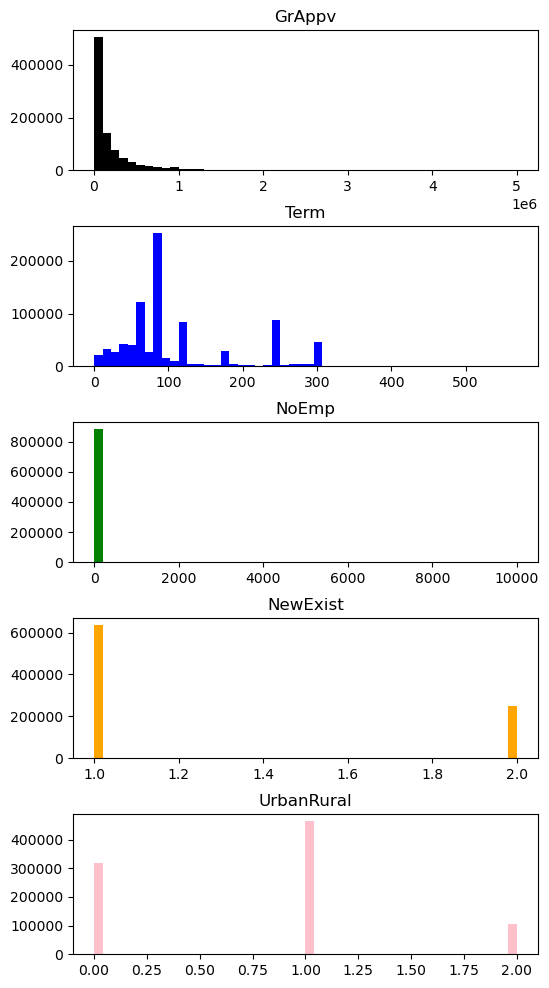

In [32]:
colors=['black','blue','green','orange','pink']
numeric_columns = df.select_dtypes(['int64','float64']).columns
def plot_histograms(df, columns):
    fig, axs = plt.subplots(ncols=1, nrows=len(columns), figsize=(6,12))
    for i, col in enumerate(columns):
        axs[i].hist(df[col], bins=50,color=colors[i])
        axs[i].set_title(col)
    plt.subplots_adjust(wspace=0.2,hspace=0.4)
    plt.show()
plot_histograms(df,numeric_columns)

Based on this univariate analysis, we note that the numerical columns are not normally distributed. 

<b> what did we do about the fact that it wasn't normally distributed? </b> -- did we do log transformations?

### Multivariate Analysis 

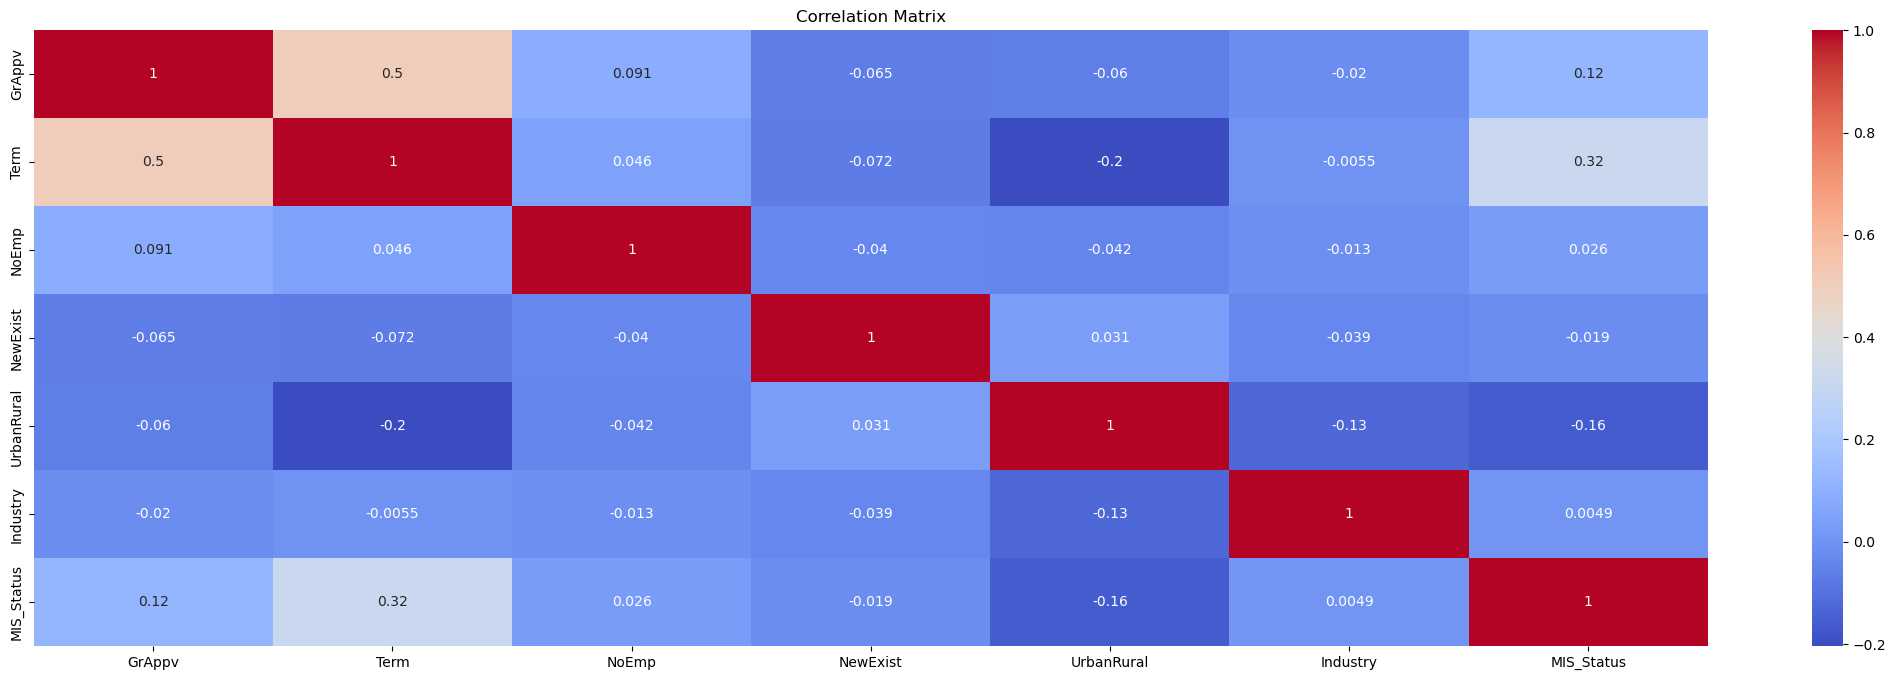

In [33]:
# Create a new DataFrame for encoded variables
# Perform label encoding on each categorical column
encoded_df=pd.DataFrame()
for column in df.columns:
    if df[column].dtype == 'object':
        encoded_df[column] = df[column].astype('category').cat.codes
    else:
        encoded_df[column] = df[column]

# Calculate the correlation matrix
correlation_matrix = encoded_df.corr()

# Plot the correlation matrix using a heatmap

plt.figure(figsize=(27, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

* From the matrix, it is clear that the higher the job creation the higher the retention rate since the two have a correlation of ```99%```.

## Preprocessing

### Encoding

As there were categorical columns, we decided to encode the columns, as part of our preparation to conduct the modeling.

In [34]:
# Encoding DataFrame
encoded_df=pd.DataFrame()
for column in df.columns:
    if df[column].dtype == 'object':
        encoded_df[column] = df[column].astype('category').cat.codes
    else:
        encoded_df[column] = df[column]

In [35]:
# Displaying Info
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885456 entries, 0 to 885455
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   GrAppv      885456 non-null  float64
 1   Term        885456 non-null  int64  
 2   NoEmp       885456 non-null  int64  
 3   NewExist    885456 non-null  float64
 4   UrbanRural  885456 non-null  int64  
 5   Industry    885456 non-null  int8   
 6   MIS_Status  885456 non-null  int8   
dtypes: float64(2), int64(3), int8(2)
memory usage: 35.5 MB


As noted in the cell above, all of our columns are now in the format of either a float or integer, therefore we have successfully encoded the categorical columns. 

In the next sections, we will be splitting our data, resampling and scaling it. 

### Train Test Split

In [36]:
# Extracting Independent Variables
X=encoded_df.drop('MIS_Status',axis=1)
# Extracting Dependent Values
y=encoded_df['MIS_Status']

# Splitting the data
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

### Resampling

In [37]:
# Initializing Sampler
sampler=RandomOverSampler(sampling_strategy='minority')
# Fitting Sampler
X_train, y_train = sampler.fit_resample(X_train,y_train)

In [38]:
# Checking Distribution
y_train.value_counts(normalize=True)

1    0.5
0    0.5
Name: MIS_Status, dtype: float64

### Scaling

In [39]:
from sklearn.preprocessing import StandardScaler
# Initializing Scaler
scaler=StandardScaler()
# Fitting Scaler
scaler.fit(X_train)
# Transforming Data
columns=['GrAppv', 'Term', 'NoEmp','NewExist', 'UrbanRural', 'Industry']
scaled_X_train=pd.DataFrame(scaler.transform(X_train),columns=columns)
scaled_X_test=pd.DataFrame(scaler.transform(X_test),columns=columns)

scaled_X_test.head()

,GrAppv,Term,NoEmp,NewExist,UrbanRural,Industry
0,2.820669,2.059672,0.120767,-0.636774,-1.390081,-0.289057
1,0.011812,-0.077716,0.076798,-0.636774,-1.390081,0.215624
2,0.519899,-0.255832,-0.099079,-0.636774,-1.390081,-0.289057
3,0.021399,1.237599,-0.099079,1.570416,-1.390081,0.383850
4,-0.553793,-0.077716,-0.113735,1.570416,0.251611,0.383850


### Modeling



#### Expected Input 
1. Business Name
2. Amount of Loan
3. Loan Repayment Period
4. Pay Previous Loan Status
5. No.of Employees 
6. Business Location
7. Business Industry
8. How long has business been in operation

#### Expected Output
1. Whether loan is guaranteed or not
2. Major factors that led to loan results

In [40]:
# Analyzing Dependent Variable
y_train.value_counts(normalize=True)

1    0.5
0    0.5
Name: MIS_Status, dtype: float64

**Models used included the following:**

`logistic regression`- This is the baseline model

`decision tree` 

`random forest`

`support vector machine`

`XGBoost`

`neural network`

### <b> <span style="color:teal">Logistic Regression</span>

In [41]:
# Creates an instance of the logistic regression model
logreg_model = LogisticRegression()

# Trains the model on the scaled training data
logreg_model.fit(scaled_X_train, y_train)

# Predicts on the scaled test data
train_pred = logreg_model.predict(scaled_X_train)
test_pred = logreg_model.predict(scaled_X_test)

# Evaluates the model on the scaled test data
train_accuracy = accuracy_score(train_pred, y_train)
test_accuracy = accuracy_score(test_pred, y_test)
print('Train Accuracy:', train_accuracy)
print('Test Accuracy:' , test_accuracy)

Train Accuracy: 0.7796959219827778
Test Accuracy: 0.7463182978338943


Based on our success metric of at least 85% accuracy, the baseline model does not achieve it, therefore we proceeded to try and explore other models to see if the accuracy improves.

### <b> <span style="color:teal">Decision Tree</span>


In [42]:
# Create and train the decision tree model
tree_model = DecisionTreeClassifier()
tree_model.fit(scaled_X_train, y_train)

# Predicting on scaled data
train_pred = tree_model.predict(scaled_X_train)
test_pred = tree_model.predict(scaled_X_test)

# Evaluate the model on the scaled test data
train_accuracy = accuracy_score(train_pred, y_train)
test_accuracy = accuracy_score(test_pred, y_test)
print('Train Accuracy:', train_accuracy)
print('Test Accuracy:' , test_accuracy)

Train Accuracy: 0.9831059201666706
Test Accuracy: 0.8943769340229937


### <b> <span style="color:teal">Random Forest </span>


In [43]:
# Initializing Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10)

# Fitting the model
rf_model.fit(scaled_X_train, y_train)

# Making Predictions
train_pred = rf_model.predict(scaled_X_train)
test_pred = rf_model.predict(scaled_X_test)

# Evaluate the model on the scaled test data
train_accuracy = accuracy_score(train_pred, y_train)
test_accuracy = accuracy_score(test_pred, y_test)
print('Train Accuracy:', train_accuracy)
print('Test Accuracy:' , test_accuracy)

Train Accuracy: 0.875863079226818
Test Accuracy: 0.8788313419013846


### <b> <span style="color:teal">Support Vector Machine</span>


In [44]:
# Creating an instance of SGDClassifier with the 'hinge' loss function
svm = SGDClassifier(loss='hinge')

# Defining Parameter Grid
param_grid = {
    'alpha': [0.0001, 0.001, 0.01],
    'penalty': ['l2', 'l1']
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(svm, param_grid, cv=5)
grid_search.fit(scaled_X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'alpha': 0.01, 'penalty': 'l1'}
Best Score: 0.7834377875867321


In [45]:
# Use the best model obtained from grid search
best_model = grid_search.best_estimator_

# Predict on the scaled test data
y_pred_test = best_model.predict(scaled_X_test)

# Predict on the scaled training data
y_pred_train = best_model.predict(scaled_X_train)

# Calculate the accuracy of the model on the training data
accuracy_train = accuracy_score( y_train, y_pred_train)
print("Training Accuracy:", accuracy_train)

# Calculate the accuracy of the model on the test data
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Test Accuracy:", accuracy_test)

Training Accuracy: 0.7828920992485429
Test Accuracy: 0.7545964809251688


### <b> <span style="color:teal">XGBoost</span>

In [46]:
# Create an instance of the XGBoostModel class
xgboost_model = XGBClassifier()

# Train the model
xgboost_model.fit(scaled_X_train, y_train)

# Evaluate the model on the train and test set
train_pred = xgboost_model.predict(scaled_X_train)
test_pred = xgboost_model.predict(scaled_X_test)

# Evaluate the model on the scaled test data
train_accuracy = accuracy_score(train_pred, y_train)
test_accuracy = accuracy_score(test_pred, y_test)
print('Train Accuracy:', train_accuracy)
print('Test Accuracy:' , test_accuracy)

Train Accuracy: 0.9126461023941775
Test Accuracy: 0.9081607300160368


### <b> <span style="color:teal">Neural Network</span>


In [52]:
# Initializing network
network = Sequential()

# Adding Layers
network.add(Flatten(input_shape=(6, 1))) # Flatten 2D image to 1D vector
network.add(Dense(328, activation='relu'))
network.add(Dense(128,activation='relu'))
network.add(Dense(64,activation='relu'))
network.add(Dense(128,activation='relu'))
network.add(Dense(1, activation='sigmoid'))

# Compiling network
network.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
network.fit(scaled_X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)

# Making binary predictions
y_pred = network.predict(scaled_X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

Epoch 1/20
32832/32832 [==============================] - 130s 4ms/step - loss: 0.3768 - accuracy: 0.8453 - val_loss: 0.4253 - val_accuracy: 0.8336
Epoch 2/20
32832/32832 [==============================] - 134s 4ms/step - loss: 0.3413 - accuracy: 0.8638 - val_loss: 0.3730 - val_accuracy: 0.8627
Epoch 3/20
32832/32832 [==============================] - 132s 4ms/step - loss: 0.3272 - accuracy: 0.8680 - val_loss: 0.3399 - val_accuracy: 0.8657
Epoch 4/20
32832/32832 [==============================] - 141s 4ms/step - loss: 0.3173 - accuracy: 0.8708 - val_loss: 0.3368 - val_accuracy: 0.8783
Epoch 5/20
32832/32832 [==============================] - 131s 4ms/step - loss: 0.3098 - accuracy: 0.8734 - val_loss: 0.3494 - val_accuracy: 0.8585
Epoch 6/20
32832/32832 [==============================] - 121s 4ms/step - loss: 0.3002 - accuracy: 0.8758 - val_loss: 0.3235 - val_accuracy: 0.8684
Epoch 7/20
32832/32832 [==============================] - 132s 4ms/step - loss: 0.2932 - accuracy: 0.8778 - val_

In [53]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred_binary,y_test)

0.8989338874709191

## Model Selection 

Upon running our models, we noted that there was no significant difference when we attempted to tune them, therefore for the sake of readability, we decided to remove the tuned models from this notebook. 

We therefore concluded that the best performing model was XGBoost, as it has a Test accuracy of upto <b> 91% </b>

### Pipeline 

In the preparation to deploy our model on [Streamlit](https://streamlit.io/), we built a pipeline that uses the trained XGBoost model, we then proceeded to create a pickle file. 

In [54]:
# Declaring the steps in our pipeline 
pipeline=Pipeline([
    ('scaler',StandardScaler()),
    ('model', XGBClassifier())
])

In [55]:
# Fitting the pipeline to the training data
pipeline.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

### Pickling the pileline

In [56]:
# Creating the pickle file for the pipeline
import pickle
filename = 'pipeline.pkl'
pickle.dump(pipeline, open(filename, 'wb'))

## <b> Google Cloud Function 


is it necessary in the notebook ?</b>

In [57]:
def predict(GrAppv, Term, NoEmp, NewExist, UrbanRural, Industry,model):
    model=model.load()
    value_dictionary={'Other': 12,
         'Construction': 4,
         'Prof/Science/Tech': 14,
         'Accom/Food_serv': 0,
         'Manufacturing': 9,
         'Wholesale_trade': 20,
         'Retail_trade': 17,
         'Other_no_pub': 13,
         'Healthcare/Social_assist': 7,
         'Admin_sup/Waste_Mgmt_Rem': 1,
         'Arts/Entertain/Rec': 3,
         'RE/Rental/Lease': 16,
         'Information': 8,
         'Ag/For/Fish/Hunt': 2,
         'Educational': 5,
         'Trans/Ware': 18,
         'Min/Quar/Oil_Gas_ext': 11,
         'Mgmt_comp': 10,
         'Utilities': 19,
         'Finance/Insurance': 6,
         'Public_Admin': 15}
    value=value_dictionary['Industry']
    input_=[GrAppv, Term, NoEmp, NewExist, UrbanRural, value]
    result=model.predict(input_)
    if result==0:
        return 'Sorry, your loan request was not succesful. \n \
        Please check on the following to improving your chances \
        of getting an SBA loan'
    else:
        return 'Congratulations. You have passed the SBA initial loan processing analysis.\n \
        Please proceed to the next step and upload necessary documents. \
        We`ll be in touch shortly'

In [58]:
# Creating a new dataframe to encode the industry column 
new_df=pd.DataFrame(df.Industry,columns=['Industry'])
new_df['Encoded'] = new_df.Industry.astype('category').cat.codes

In [59]:
unique_industries=list(pd.DataFrame(new_df.Industry.value_counts()).index) # 

In [61]:
encoded_df['Industry_raw']=df['Industry']
industry_df=encoded_df[['Industry','Industry_raw']]

In [63]:
value_dictionary={}
for i in range(len(industry_df)):
    row=industry_df.iloc[i]
    value_dictionary[row.Industry_raw]=row.Industry

In [64]:
value_dictionary # Showing the Industry and the corresponding encoded value 

{'Other': 12,
 'Construction': 4,
 'Prof/Science/Tech': 14,
 'Accom/Food_serv': 0,
 'Manufacturing': 9,
 'Wholesale_trade': 20,
 'Retail_trade': 17,
 'Other_no_pub': 13,
 'Healthcare/Social_assist': 7,
 'Admin_sup/Waste_Mgmt_Rem': 1,
 'Arts/Entertain/Rec': 3,
 'RE/Rental/Lease': 16,
 'Information': 8,
 'Ag/For/Fish/Hunt': 2,
 'Educational': 5,
 'Trans/Ware': 18,
 'Min/Quar/Oil_Gas_ext': 11,
 'Mgmt_comp': 10,
 'Utilities': 19,
 'Finance/Insurance': 6,
 'Public_Admin': 15}

## <b> Recommendations </b>

Upon conducting this project we would recommend the following to the stakeholder:

- Where SBA is [not] the main stakeholder : how SBA can support the small businesses 

1. Loan amount recommendations: Provide guidance to small businesses on the appropriate loan amount to apply for based on the loan amount distribution. This could include identifying the most common loan sizes and advising small businesses to apply for loans within those ranges.

2. New vs existing business recommendations: This could include advising new businesses to seek loans that are appropriate for their stage of development, and advising existing businesses to seek loans that are appropriate for their growth plans, also the new businesses can benefit from some of the services that are already available.

3. Urban vs rural business recommendations: This could include advising small businesses to seek loans that are appropriate for their location and the needs of their local community. Additionally, the SBA should ensure the distribution of loans is easily accessible to those in the Rural/Semi-urban regions, in order to encourage development. 

4. Industry-specific recommendations:  Provide guidance to small businesses on the loan amount ranges or eligibility criteria for different industries based on the loan distribution. This could include advising small businesses to seek loans that are tailored to the specific needs of their industry.


SBA is the main stakeholder 


1. Loan term recommendations: Provide recommendations to SBA on the appropriate loan term ranges for different types of businesses based on the loan term distribution. This could include identifying the most common loan terms and advising SBA to set loan term limits or eligibility criteria based on those terms.

2. Business size recommendations: Provide recommendations to SBA on the appropriate loan amount ranges or eligibility criteria for different business sizes based on the employee count distribution. This could include advising SBA to set loan amount limits or eligibility criteria that are appropriate for different business sizes.

3. New vs existing business recommendations: Provide recommendations to SBA on the loan amount ranges or eligibility criteria for new vs existing businesses based on the loan distribution. This could include advising SBA to set loan amount limits or eligibility criteria that are appropriate for different stages of business development.


4. Urban vs rural business recommendations: Provide recommendations to SBA on the loan amount ranges or eligibility criteria for urban vs rural businesses based on the loan distribution. This could include advising SBA to set loan amount limits or eligibility criteria that are appropriate for different types of geographic areas.

5. Industry-specific recommendations: Provide recommendations to SBA on the loan amount ranges or eligibility criteria for different industries based on the loan distribution. This could include advising SBA to set loan amount limits or eligibility criteria that are tailored to the specific needs of different industries.